In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [3]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [4]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


<AxesSubplot:xlabel='Chirps/Second', ylabel='Density'>

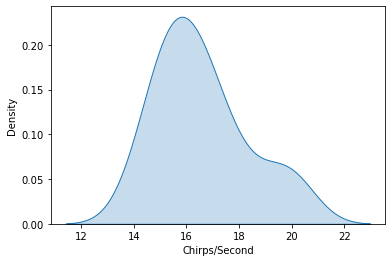

In [8]:
sns.kdeplot(df['Chirps/Second'], shade=True)

<AxesSubplot:xlabel='Ground Temperature', ylabel='Density'>

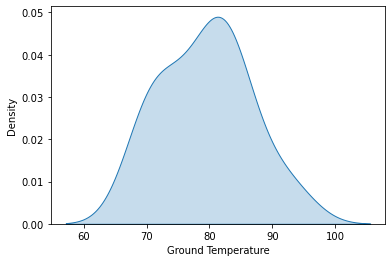

In [10]:
sns.kdeplot(df['Ground Temperature'], shade=True)

<AxesSubplot:xlabel='Chirps/Second', ylabel='Ground Temperature'>

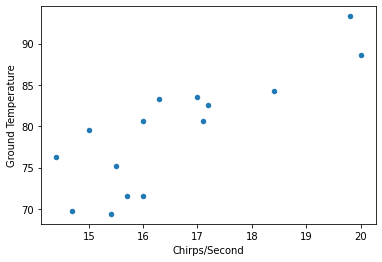

In [14]:
df.plot.scatter(x = "Chirps/Second", y = "Ground Temperature")

{'whiskers': [<matplotlib.lines.Line2D at 0x26434f21f10>,
 'caps': [<matplotlib.lines.Line2D at 0x26434f20880>,
 'boxes': [<matplotlib.lines.Line2D at 0x26434f23640>],
 'medians': [<matplotlib.lines.Line2D at 0x26434f20430>],
 'fliers': [<matplotlib.lines.Line2D at 0x26434f1ee20>],
 'means': []}

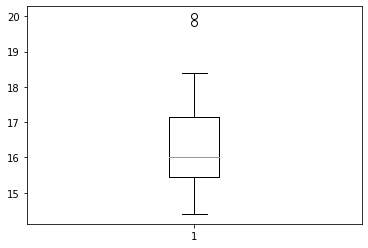

In [15]:
plt.boxplot(df["Chirps/Second"])

{'whiskers': [<matplotlib.lines.Line2D at 0x26434857c10>,
 'caps': [<matplotlib.lines.Line2D at 0x26434713220>,
 'boxes': [<matplotlib.lines.Line2D at 0x264347193d0>],
 'medians': [<matplotlib.lines.Line2D at 0x264346fdee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x264346fd6d0>],
 'means': []}

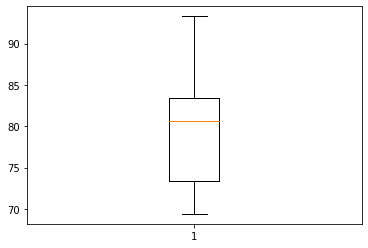

In [16]:
plt.boxplot(df["Ground Temperature"])

In [32]:
X=df['Chirps/Second'].values
Y=df['Ground Temperature'].values

In [20]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=1/3, random_state=0)

In [25]:
from sklearn.linear_model import LinearRegression


In [26]:
lr=LinearRegression()
lr

LinearRegression()

In [28]:
lr.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

In [29]:
y_pred=lr.predict(X_test.reshape(-1,1))


In [30]:
m=lr.coef_[0]
b=lr.intercept_
print("slope=",m, "intercept=",b)

slope= 3.0754154394385655 intercept= 29.18511690483983


In [31]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.089302934438751
Mean Squared Error: 28.623910215513757
Root Mean Squared Error: 5.350131794219069


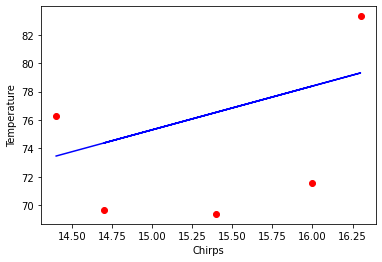

In [34]:
plt.scatter(X_test.reshape(-1,1),y_test,color='r')
plt.plot(X_test.reshape(-1,1),lr.predict(X_test.reshape(-1,1)), color='b')
plt.xlabel("Chirps")
plt.ylabel("Temperature")
plt.show()

# 𝑅2 score

In [35]:
lr.score(X_train.reshape(-1,1), y_train)

0.7578305202106923

In [36]:
print('Train Score: ', lr.score(X_train.reshape(-1,1), y_train))  
print('Test Score: ', lr.score(X_test.reshape(-1,1), y_test))

Train Score:  0.7578305202106923
Test Score:  -0.04335834629201951


In [37]:
lr.coef_

array([3.07541544])

In [41]:
lr = sm.OLS(y_train,sm.add_constant(X_train))

model_results = lr.fit()

model_results.summary()

C:\Users\csvel\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     25.03
Date:                Sun, 14 Nov 2021   Prob (F-statistic):            0.00105
Time:                        11:17:37   Log-Likelihood:                -24.778
No. Observations:                  10   AIC:                             53.56
Df Residuals:                       8   BIC:                             54.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.1851     10.603      2.753      0.025       4.735      53.635
x1             3.0754      0.615      5.003      0.001       1.658       4.493
==============================================================================
Omnibus:                        0.489   Durbin-Watson:                   2.275
Prob(Omnibus):                  0.783   Jarque-Bera (JB):                0.349
Skew:                          -0.373   Prob(JB):                        0.840
Kurtosis:                       2.468   Cond. No.                         180.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""